**pr_9_AB_test**

A/B-test: prioritization of hypotheses for site development, interpretation of results.

# Проект: Принятие решений в бизнесе. A/B-тест

С целью увеличения выручки интернет-магазина вместе с отделом маркетинга подготовлен список гипотез. <br>
Выполним их приоритизацию. По результатам запустим A/B-тест и проанализируем результаты. 

Когда получим результаты A/B-теста, проверим их на непротиворечивость, полноту, отсутствие дубликатов, сделаем вывод о корректности организации сбора и выгрузки данных. 

Изучим метрики по группам A/B-теста с детализацией по дням:
- Кумулятивная выручка;
- Кумулятивный средний чек;
- Относительное изменение кумулятивного среднего чека группы B к группе A;
- Кумулятивное среднее количество заказов на посетителя;
- Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A;
- Распределение количества заказов на пользователя;
- 95-й и 99-й перцентили количества заказов на пользователя;
- Распределение стоимостей заказов;
-  95-й и 99-й перцентили стоимостей заказов;

Проверим наличие статистически значимых различий:
- в среднем количестве заказов на посетителя между группами по «сырым» данным;
- в среднем чеке заказа между группами по «сырым» данным;
- в среднем количестве заказов на посетителя между группами по «очищенным» данным;
- в среднем чеке заказа между группами по «очищенным» данным.

По результатам исследования подготовим общий вывод с рекомендациями. 

## Приоритизация гипотез

Загрузим данные о гипотезах.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import datetime as dt

In [2]:
!head -n 3 /datasets/hypothesis.csv

In [3]:
try:
    gs = pd.read_csv('/datasets/hypothesis.csv', sep=',')
    gs.columns = gs.columns.str.lower()
except:
    print('Файл не загружен. Проверьте путь к файлу.')

Познакомимся с гипотезами. 

In [4]:
with pd.option_context('display.max_colwidth', 500):
    display(gs)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Описание данных

- `hypothesis` — краткое описание гипотезы;
- `reach` — охват пользователей по 10-балльной шкале;
- `impact` — влияние на пользователей по 10-балльной шкале;
- `confidence` — уверенность в гипотезе по 10-балльной шкале;
- `efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Проверим типы данных в столбцах. 

In [5]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Цифровые параметры имеют тип int. Преобразование типов данных, удаление дубликатов не требуется. 

В файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. <br> Применим фреймворки ICE и RICE для приоритизации гипотез. 

### Приоритизация гипотез через фреймворк ICE

Рассчитаем оценку по фреймворку ICE.

In [6]:
gs['ice_score'] = gs.impact * gs.confidence / gs.efforts

In [7]:
with pd.option_context('display.max_colwidth', 500):
    display(
        gs.sort_values(by='ice_score', ascending=False)
        .style
        .format({'ice_score': '{0:.2f}'})
    )

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Три лидирующие гипотезы, выявленные с помощью фреймворка ICE: 
- Запустить акцию, дающую скидку на товар в день рождения - 16.2;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - 13.33;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - 11.2.

### Приоритизация гипотез через фреймворк RICE

Рассчитаем оценку по фреймворку RICE.

In [8]:
gs['rice_score'] = gs.reach * gs.impact * gs.confidence / gs.efforts

In [9]:
with pd.option_context('display.max_colwidth', 500):
    display(
        gs.sort_values(by='rice_score', ascending=False)
        .style
        .format({'ice_score': '{0:.2f}'})
        .format({'rice_score': '{0:.2f}'})
    )

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


Три лидирующие гипотезы, выявленные с помощью фреймворка RICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - 112;
- Добавить блоки рекомендаций товаров на сайт интернет-магазина, чтобы повысить конверсию и средний чек заказа - 56;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - 40.

## Вывод. Приоритизация гипотез

При применении фреймворка RICE гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" с третьего места (оценка ice 11.2) поднялась до первого с оценкой rice 112.

Тройку лидеров покинули гипотезы: 
- Запустить акцию, дающую скидку на товар в день рождения (ice 16.2, rice 16.2);
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (ice 13.33, rice ).

В тройку лидеров добавились две новых гипотезы:
- Добавить блоки рекомендаций товаров на сайт интернет-магазина, чтобы повысить конверсию и средний чек заказа (ice 7, rice 56);
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (ice 13.3, rice 40).

Причина изменения — добавление множителя Reach — охват пользователей. Гипотезы, затрагивающие малое количество пользователей, получают пониженный рейтинг. 

Добавление каналов продвижения ведет к изменению бюджета отдела маркетинга, поэтому не является первоочередной для проверки. 

В первую очередь проверим гипотезу **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".** 

## Анализ A/B-теста 

Мы провели A/B-тест и получили результаты. Получим данные A/B-теста.

### Получим данные

#### Информация о заказах

Получим данные из файла. 

In [10]:
!head -n 3 /datasets/orders.csv

In [11]:
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',', header=0, parse_dates=['date'],
                         names=['transaction_id', 'visitor_id', 'date', 'revenue' , 'group'])
except:
    print('Файл не получен. Проверьте путь до файла.')

Выведем начало файла.

In [12]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**Описание данных о заказах:**
- `transaction_id` — идентификатор заказа;
- `visitor_id` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


#### Информация о посетителях

Получим данные из файла. 

In [14]:
!head -n 3 /datasets/visitors.csv

In [15]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',', parse_dates=['date'])
except:
    print('Файл не получен. Проверьте путь до файла.')

Выведем начало файла.

In [16]:
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


**Описание данных о посетителях:**
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Проверим данные на наличие пропусков.**

In [18]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [19]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

В данных отсутствуют пропуски.

### Подготовка данных

#### Наличие дубликатов

Проверим данные на наличие дубликатов.

In [20]:
orders.duplicated().sum()

0

In [21]:
visitors.duplicated().sum()

0

В данных отсутствуют дубликаты. 

#### Минимальные и максимальные даты

Проверим данные на минимальные и максимальные даты.

In [22]:
print('orders. Минимальная дата:', orders['date'].min(), 'Максимальная дата', orders['date'].max())

orders. Минимальная дата: 2019-08-01 00:00:00 Максимальная дата 2019-08-31 00:00:00


In [23]:
print('visitors. Минимальная дата:', visitors['date'].min(), 'Максимальная дата', visitors['date'].max())

visitors. Минимальная дата: 2019-08-01 00:00:00 Максимальная дата 2019-08-31 00:00:00


Для анализа предоставлены данные с 1 по 31 августа 2019 года. 

#### Дублирование посетителей в группах

Проверим отсутствие вхождений одних и тех же посетителей в разные группы A/B-теста.

Для этого подготовим выборки заказов по группам A/B-теста. 

Заказы группы A.

In [24]:
orders_a = orders[orders['group'] == 'A']
orders_a.head(2)

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
7,2626614568,78758296,2019-08-15,1044,A


Заказы группы B.

In [25]:
orders_b = orders[orders['group'] == 'B']
orders_b.head(2)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


Проверим пересечения заказов между группами теста по идентификатору посетителя. 

In [26]:
overlapping_orders = orders_a.merge(orders_b, on='visitor_id', how='inner', suffixes=('_a', '_b'))
overlapping_orders

,transaction_id_a,visitor_id,date_a,revenue_a,group_a,transaction_id_b,date_b,revenue_b,group_b
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B
...,...,...,...,...,...,...,...,...,...
178,3757656646,4186807279,2019-08-14,4990,A,1759418862,2019-08-21,18560,B
179,3757656646,4186807279,2019-08-14,4990,A,380064637,2019-08-27,13740,B
180,3612788481,2712142231,2019-08-14,2490,A,1251767592,2019-08-16,790,B
181,4052155355,2949041841,2019-08-14,190,A,1329499668,2019-08-14,10380,B


Всего 183 пересечения заказов посетителей в обеих группах А/В-теста. 

Сохраним перечень проблемных посетителей.

In [27]:
conflicting_visitors = overlapping_orders['visitor_id'].unique()
conflicting_visitors

array([4069496402,  199603092, 3803269165, 2378935119,  237748145,
       4256040402, 2038680547, 1738359350, 2458001652, 3891541246,
       2716752286, 3656415546, 2686716486, 2954449915, 2927087541,
       3234906277,  457167155, 2579882178, 3957174400, 1648269707,
       2780786433,  818047933, 2044997962, 1959144690, 3202540741,
       1333886533,  351125977, 3951559397,  393266494, 3984495233,
       4120364173, 4266935830, 1230306981, 1294878855, 1614305549,
          8300375,  477780734, 1668030113, 3717692402, 3766097110,
       3941795274,  471551937, 1316129916, 1801183820, 1602967004,
       2587333274, 2600415354,  232979603, 3972127743, 1404934699,
        276558944, 3062433592, 2654030115, 3963646447, 4186807279,
       2712142231, 2949041841,  963407295])

Посчитаем количество проблемных посетителей.

In [28]:
len(conflicting_visitors)

58

Их доля от общего числа посетителей.

In [29]:
print('{0:.1%}'.format(len(conflicting_visitors) / orders['visitor_id'].nunique()))

5.6%


Посмотрим на заказы проблемных посетителей. 

In [30]:
conflicting_orders = orders[orders['visitor_id'].isin(conflicting_visitors)].sort_values(by=['visitor_id', 'date'])
conflicting_orders

,transaction_id,visitor_id,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A
246,437656952,199603092,2019-08-02,3488,B
1102,1941707234,199603092,2019-08-12,6438,A
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
901,3402467119,4256040402,2019-08-27,1630,A
1018,1415970216,4256040402,2019-08-31,5170,A
1019,453824282,4256040402,2019-08-31,1850,B
662,1811671147,4266935830,2019-08-29,78990,A


Видим, что у части посетителей ранее созданы заказы для группы B, у других, наоборот, для группы А. <br>У посетителя с id 4266935830 заказ с одинаковой суммой присутствует в обеих группах. 

Посчитаем долю заказов проблемных посетителей от общего числа заказов. 

In [31]:
print('Доля проблемных заказов от общего числа: ', 
      '{0:.1%}'.format(conflicting_orders['transaction_id'].count() / orders['transaction_id'].count()),
      '\nДоля выручки проблемных заказов от общего числа: ', 
      '{0:.1%}'.format(conflicting_orders['revenue'].sum() / orders['revenue'].sum())
)

Доля проблемных заказов от общего числа:  15.1% 
Доля выручки проблемных заказов от общего числа:  15.6%


Посетители относятся к группе А или В по дате первого посещения, а не по дате размещения первого заказа. В представленных данных отсутствует информация, позволяющая достоверно разрешить коллизии "группа А/В-теста - идентификатор посетителя". Поэтому все заказы конфликтных посетителей удаляем. 

In [32]:
print('Количество заказов до удаления информации о конфликтующих посетителях: ', orders.shape[0])
orders = orders[~orders['visitor_id'].isin(conflicting_visitors)]
print('Количество заказов после удаления информации о конфликтующих посетителях: ', orders.shape[0])

Количество заказов до удаления информации о конфликтующих посетителях:  1197
Количество заказов после удаления информации о конфликтующих посетителях:  1016


Заказы проблемных посетителей удалены. 

**Проверим распределение посещений по группам A/B-теста.**

In [33]:
result = visitors.groupby('group').agg({'visitors': 'sum'}, as_index=False)
result['diff'] = result['visitors'].diff()
result['ratio'] = round((result['visitors'] / result['visitors'].sum()) * 100, 1)
result

,visitors,diff,ratio
group,,,
A,18736,NaN,49.8
B,18916,180.0,50.2


Распределение посетителей по группам равномерное. Отличие составляет 0.2% или 180 посещений. 

### Вывод. Подготовка данных

Для анализа предоставлены данные A/B-теста за период с 1 до 31 августа 2019 года. В данных отсутствуют дубликаты и пропуски. 

В данных допущена неточность в отношении присвоения группы А/В-теста 58 посетителям. Их заказы составляли 15.1% от общего числа заказов и 15.6% от общей выручки. Заказы данных посетителей из выборки удалили, так как в данных нет информации о первом визите посетителя, а значит, восстановить корректное назначение группе А/В-теста мы не можем.  

Можем приступать к анализу результатов.

### Исследовательский анализ данных

#### Кумулятивные данные

Вычислим кумулятивные результаты теста. 

Создадим массив уникальных пар значений дат и групп теста.

In [34]:
dates_groups = orders[['date', 'group']].drop_duplicates().sort_values(by='date')
dates_groups

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
383,2019-08-03,B
...,...,...
533,2019-08-29,B
757,2019-08-30,A
690,2019-08-30,B
930,2019-08-31,B


Посчитаем агрегированные по дням кумулятивные данные о заказах. 

In [35]:
orders_aggregated = []
orders_aggregated = (
    dates_groups
    .apply(
        lambda x: 
            orders[
                    np.logical_and(
                        orders.date <= x.date,
                        orders.group == x.group
                    )
            ]
            .agg(
                {
                    'date': 'max',
                    'group': 'max',
                    'transaction_id': 'nunique',
                    'visitor_id': 'nunique',
                    'revenue': 'sum'
                }
            ), 
        axis=1
    )
    .sort_values(by=['date', 'group'])
)   
orders_aggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


Посчитаем агрегированные по дням кумулятивные данные о пользователях.

In [36]:
visitors_aggregated = []
visitors_aggregated = (
    dates_groups
    .apply(
        lambda x:
            visitors[
                np.logical_and(
                    visitors['date'] <= x['date'],
                    visitors['group'] == x['group']
                )
            ]
            .agg(
                {
                    'date': 'max',
                    'group': 'max',
                    'visitors': 'sum'
                }
            ), 
        axis=1
    )
    .sort_values(by=['date', 'group'])
)
visitors_aggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Объединим кумулятивные данные в одной таблице и присвоим её столбцам понятные названия.

In [37]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


#### График кумулятивной выручки

Создадим выборки по группам.

In [38]:
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_revenue_a.tail()

,date,revenue,orders
52,2019-08-27,2940471,419
54,2019-08-28,3036933,434
56,2019-08-29,3233233,451
58,2019-08-30,3311413,460
60,2019-08-31,3364656,468


In [39]:
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]
cumulative_revenue_b.tail()

,date,revenue,orders
53,2019-08-27,4579312,473
55,2019-08-28,4640510,495
57,2019-08-29,4746610,510
59,2019-08-30,4955833,531
61,2019-08-31,5068972,548


Выведем график кумулятивной выручки.

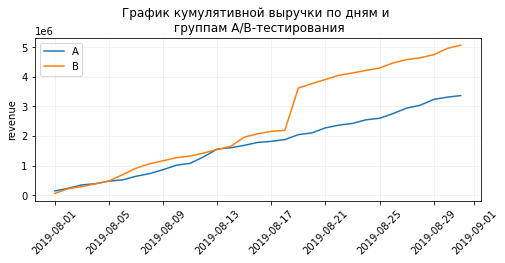

In [40]:
fig, ax = plt.subplots(figsize=(8, 3))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.legend()
ax.set_ylabel('revenue')
plt.xticks(rotation=45)
ax.grid(b=True, color='grey', which='both', linestyle='-', linewidth=0.5, alpha=0.2)
ax.set_title('График кумулятивной выручки по дням и \n группам A/B-тестирования')
plt.show()

Выручка обеих групп стабильно возрастает, при этом выручка группы B выше начиная с 5 августа. 

В период с 18 по 19 августа выручка группы B резко возрастает. Это может сигнализировать о всплеске числа заказов либо о появлении очень дорогих заказов в выборке. Проанализируем это ниже. 

#### График кумулятивного среднего чека по группам

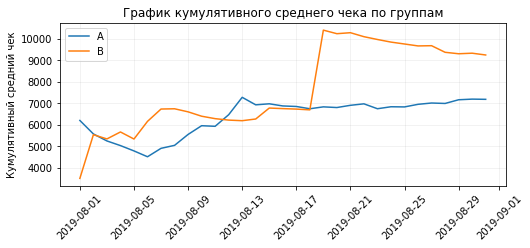

In [41]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(
    cumulative_revenue_a['date'],
    cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
    label='A'
)
ax.plot(
    cumulative_revenue_b['date'],
    cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'],
    label='B'
)
plt.legend()
ax.set_ylabel('Кумулятивный средний чек')
plt.xticks(rotation=45)
ax.grid(b=True, linestyle='-', color='grey', linewidth=0.5, alpha=0.2)
ax.set_title('График кумулятивного среднего чека по группам')
plt.show()

Кумулятивный средний чек группы А падал с 1 по 6 августа, затем возрастал с 6 по 13 августа и с 14 августа находится примерно на одном уровне. 

Кумулятивный средний чек группы B выше, чем в группе А в период со 2 по 11 и с 18 по 31 августа. <br>
Показатель сильно вырос в период с 18 по 19 августа и затем стал немного снижаться.  <br>
Вероятно, в группе B возникли аномально дорогие заказы, возможно, из-за какой-то дополнительной акции.<br>

После 25 августа кумулятивный средний чек обеих групп стабилизировался. 

#### График относительного изменения кумулятивного среднего чека группы B к группе A

Собираем данные в одном датафрейме. 

In [42]:
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, on='date', how='left', suffixes=['_a', '_b'])
merged_cumulative_revenue.tail()

,date,revenue_a,orders_a,revenue_b,orders_b
26,2019-08-27,2940471,419,4579312,473
27,2019-08-28,3036933,434,4640510,495
28,2019-08-29,3233233,451,4746610,510
29,2019-08-30,3311413,460,4955833,531
30,2019-08-31,3364656,468,5068972,548


Строим график относительного изменения кумулятивного среднего чека группы B к группе A.

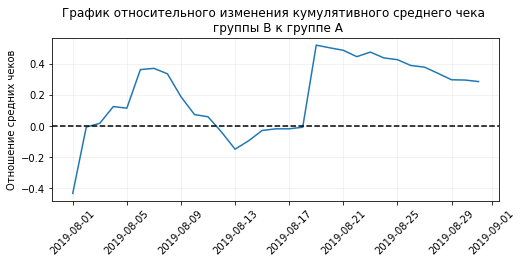

In [43]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(merged_cumulative_revenue['date'],
    (
        (merged_cumulative_revenue['revenue_b'] / merged_cumulative_revenue['orders_b']) 
        / (merged_cumulative_revenue['revenue_a'] / merged_cumulative_revenue['orders_a'])
        - 1
    )
)
ax.set_ylabel('Отношение средних чеков')
ax.set_title('График относительного изменения кумулятивного среднего чека \n группы B к группе A')
plt.xticks(rotation=45)
ax.grid(b=True, color='grey', linewidth=0.5, alpha=0.2, linestyle='-')
ax.axhline(y=0, color='black', linestyle='--')
plt.show()

Кумулятивный средний чек группы B выше кумулятивного среднего чека группы A с 3 по 10 и с 18 августа 2019 года. Резкий скачок 18 августа связываем с появлением аномально дорогих заказов. Отношение средних чеков стабилизировалось после 29 августа. Вероятно, влияние аномальных значений удалось стабилизировать. 

#### График кумулятивного среднего количества заказов на посетителя по группам

Посчитаем среднее количество заказов на посетителя. 

In [44]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.tail(3)

,date,group,orders,buyers,revenue,visitors,conversion
59,2019-08-30,B,531,511,4955833,18198,0.029179
60,2019-08-31,A,468,445,3364656,18736,0.024979
61,2019-08-31,B,548,528,5068972,18916,0.028970


Подготовим выборки по группам A и B.

In [45]:
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_a.tail(2)

,date,group,orders,buyers,revenue,visitors,conversion
58,2019-08-30,A,460,437,3311413,18037,0.025503
60,2019-08-31,A,468,445,3364656,18736,0.024979


In [46]:
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']
cumulative_data_b.tail(2)

,date,group,orders,buyers,revenue,visitors,conversion
59,2019-08-30,B,531,511,4955833,18198,0.029179
61,2019-08-31,B,548,528,5068972,18916,0.028970


Построим график кумулятивного среднего количества заказов на посетителя по группам.

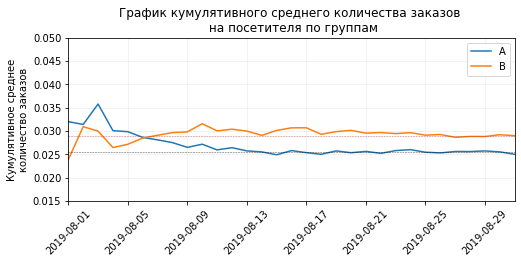

In [47]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
ax.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
ax.legend()
ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.2)
ax.set_title('График кумулятивного среднего количества заказов \n на посетителя по группам')
ax.set_ylabel('Кумулятивное среднее\nколичество заказов')
plt.xticks(rotation=45)
ax.axhline(y=0.0255, color='black', linestyle='--', alpha=0.7, linewidth=0.5)
ax.axhline(y=0.029, color='brown', linestyle='--', alpha=0.7, linewidth=0.5)
# Задаем масштаб осей
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime("2019-08-31"), 0.015, 0.05])
plt.show()

Кумулятивное среднее количество заказов группы B стабильно больше с 6 августа. 

В группе B есть локальные повышения кумулятивного среднего количества заказов на одного посетителя 10 августа и с 14 по 18 августа. Вероятно, сказались дополнительные события, повлиявшие на A/B-тест, например, реклама. 

Кумулятивное среднее количество заказов стабилизировалось с 25 августа на уровне 0.0255 для группы A и 0.029 для группы B. 

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Посчитаем конверсии по группам для каждой даты. 

In [48]:
merge_cumulative_conversion = cumulative_data_a[['date', 'conversion']].merge(
    cumulative_data_b[['date', 'conversion']], on='date', how='left', suffixes=('_a', '_b'))
merge_cumulative_conversion.tail(3)    

,date,conversion_a,conversion_b
28,2019-08-29,0.025702,0.028801
29,2019-08-30,0.025503,0.029179
30,2019-08-31,0.024979,0.028970


Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

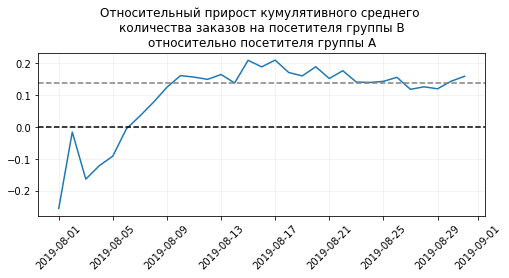

In [49]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(merge_cumulative_conversion['date'],
         merge_cumulative_conversion['conversion_b']
         / merge_cumulative_conversion['conversion_a']
         -1
)
ax.set_title(
'''Относительный прирост кумулятивного среднего 
количества заказов на посетителя группы B
относительно посетителя группы A'''
)
plt.xticks(rotation=45)
ax.grid(b=True, linestyle='-', color='grey', linewidth=0.5, alpha=0.2)
ax.axhline(y=0, color='black', linestyle='--')
ax.axhline(y=0.14, color='grey', linestyle='--')
plt.show()

До 6 августа группа B несколько проигрывала по среднему количеству заказов, затем вырвалась вперед. 

После 21 августа среднее количество заказов на посетителя стабилизировалось. Группа B уверенно лидирует. 

#### Точечный график количества заказов по пользователям

Посчитаем количество заказов на пользователя. 

In [50]:
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_users.columns = ['user_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(3)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3


Построим точечный график количества заказов по пользователям.

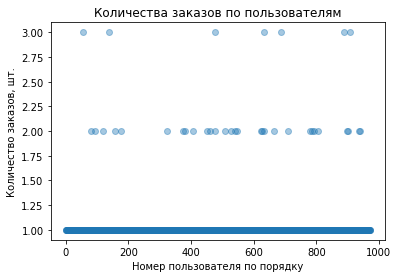

In [51]:
x_value = pd.Series(range(0, len(orders_by_users['user_id'])))
plt.scatter(x_value, orders_by_users['orders'], alpha=0.4)
plt.ylabel('Количество заказов, шт.')
plt.xlabel('Номер пользователя по порядку')
plt.title('Количества заказов по пользователям')
plt.show()

Подавляющее количество пользователей в течение августа сделали по 1 заказу. 

Встречаются пользователи, разместившие до 3 заказов. Считать их аномалиями или нет пока не понятно. 

#### 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем выборочные перцентили количества заказов на одного пользователя.

In [52]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


Не более 1% пользователей размещает 2 и более заказа. Не менее 95% пользователей размещают 1 заказ.

В качестве границы для определения аномальных пользователей выберем количество заказов равное 2 и более. 

#### Точечный график стоимостей заказов

Посмотрим на наиболее дорогие заказы. 

In [53]:
orders.sort_values(by='revenue', ascending=False).head().style.format({'revenue': '{:_}'})

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19 00:00:00,1_294_500,B
1196,3936777065,2108080724,2019-08-15 00:00:00,202_740,B
1136,666610489,1307669133,2019-08-13 00:00:00,92_550,A
744,3668308183,888512513,2019-08-27 00:00:00,86_620,B
743,3603576309,4133034833,2019-08-09 00:00:00,67_990,A


Построим точечный график стоимостей заказов.

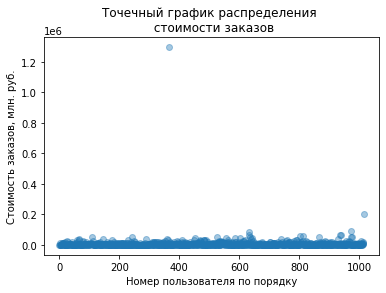

In [54]:
x_value = range(0, len(orders['revenue']))
plt.scatter(x_value, orders['revenue'], alpha=0.4)
plt.title('Точечный график распределения \n стоимости заказов')
plt.ylabel('Стоимость заказов, млн. руб.')
plt.xlabel('Номер пользователя по порядку')
plt.show()

Большинство заказов имеют стоимость до 100 тыс. руб. 

Увеличим масштаб графика со стоимостью заказов до 100 тыс. руб. 

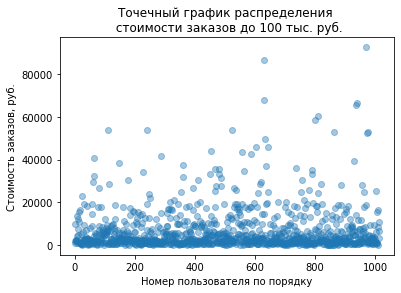

In [55]:
x_value = range(0, len(orders.query('revenue < 100_000')['revenue']))
plt.scatter(x_value, orders.query('revenue < 100_000')['revenue'], alpha=0.4)
plt.title('Точечный график распределения \n стоимости заказов до 100 тыс. руб.')
plt.ylabel('Стоимость заказов, руб.')
plt.xlabel('Номер пользователя по порядку')
plt.show()

Большинство заказов имеют стоимость до 20 тыс. руб. По графику можно выбрать границу аномальных заказов между 20 и 40 тыс. руб. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. 

Вычислим перцентили для стоимости заказов. 

#### 95-й и 99-й перцентили стоимости заказов

In [56]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% заказов дороже 26785 руб. и не более 1% заказов дороже 53904 руб. 

Примем за границу определения аномально дорогих заказов сумму 26785 руб.

### Вывод. Исследовательский анализ данных

Выручка обеих групп стабильно возрастает, при этом выручка группы B выше начиная с 5 августа.

В период с 18 по 19 августа выручка группы B резко возрастает. Это может сигнализировать о всплеске числа заказов либо о появлении очень дорогих заказов в выборке. 

**Кумулятивный средний чек группы А** падал с 1 по 6 августа, затем возрастал с 6 по 13 августа и с 14 августа находится примерно на одном уровне.

Кумулятивный средний чек группы B выше, чем в группе А в период со 2 по 11 и с 18 по 31 августа.
Показатель сильно вырос в период с 18 по 19 августа и затем стал немного снижаться.
Вероятно, в группе B возникли аномально дорогие заказы, возможно, из-за какой-то дополнительной акции.

После 25 августа кумулятивный средний чек обеих групп стабилизировался.

**Кумулятивный средний чек группы B** выше кумулятивного среднего чека группы A с 3 по 10 и с 18 августа 2019 года. Резкий скачок 18 августа связываем с появлением аномально дорогих заказов. Отношение средних чеков стабилизировалось после 29 августа. Вероятно, влияние аномальных значений удалось сгладить.

**Кумулятивное среднее количество заказов** группы B стабильно больше с 6 августа.

В группе B есть локальные повышения кумулятивного среднего количества заказов на одного посетителя 10 августа и с 14 по 18 августа. Вероятно, сказались дополнительные события, повлиявшие на A/B-тест, например, реклама.

Кумулятивное среднее количество заказов стабилизировалось с 25 августа на уровне 0.0255 для группы A и 0.029 для группы B.

До 6 августа группа B несколько проигрывала по среднему количеству заказов, затем вырвалась вперед.

После 21 августа среднее количество заказов на посетителя стабилизировалось. Группа B уверенно лидирует.

Подавляющее количество пользователей в течение августа сделали по 1 заказу. Встречаются пользователи, разместившие до 3 заказов. 

Не более 1% пользователей размещает 2 и более заказа. Не менее 95% пользователей размещают 1 заказ.

В качестве границы для определения аномальных пользователей выберем количество заказов равное 2 и более.
 
Не более 5% заказов дороже 26785 руб. и не более 1% заказов дороже 53904 руб.
За границу определения аномально дорогих заказов принимаем сумму 26785 руб.

### Проверка гипотез

#### Количество заказов на посетителя по «сырым» данным

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным - без удаления аномальных пользователей.

Сформулируем гипотезы. 
- Нулевая: различий в среднем количестве заказов между группами нет;
- Альтернативная: различия в среднем количестве заказов между группами есть.

Начнем с подготовки данных. 

**Посетители по группе A.**

Количество посетителей по дням. 

In [57]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']
visitors_a_daily.head(3)

,date,visitors_per_date_a
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507


Кумулятивное количество посетителей по дням. 

In [58]:
visitors_a_cumulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1
)
visitors_a_cumulative.columns = ['date', 'visitors_cumulative_a']
visitors_a_cumulative.head(3)

,date,visitors_cumulative_a
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845


**Посетители по группе B.**

Количество посетителей по дням. 

In [59]:
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']
visitors_b_daily.head(3)

,date,visitors_per_date_b
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509


Кумулятивное количество посетителей по дням. 

In [60]:
visitors_b_cumulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1
)
visitors_b_cumulative.columns = ['date', 'visitors_cumulative_b']
visitors_b_cumulative.head(3)

,date,visitors_cumulative_b
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803


**Заказы группы A.**

Заказы по дням.

In [61]:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']
orders_a_daily.tail(3)

,date,orders_per_date_a,revenue_per_date_a
28,2019-08-29,17,196300
29,2019-08-30,9,78180
30,2019-08-31,8,53243


Заказы по дням кумулятивно, группа A. 

In [62]:
orders_a_cumulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1
).sort_values(by='date')
orders_a_cumulative.columns = ['date', 'orders_cumulative_a', 'revenue_cumulative_a']
orders_a_cumulative.tail(3)

,date,orders_cumulative_a,revenue_cumulative_a
28,2019-08-29,451,3233233
29,2019-08-30,460,3311413
30,2019-08-31,468,3364656


**Заказы группы B.**

Заказы по дням.

In [63]:
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue':'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']
orders_b_daily.tail(3)

,date,orders_per_date_b,revenue_per_date_b
28,2019-08-29,15,106100
29,2019-08-30,21,209223
30,2019-08-31,17,113139


Заказы по дням кумулятивно, группа B. 

In [64]:
orders_b_cumulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1
).sort_values(by=['date'])
orders_b_cumulative.columns = ['date', 'orders_cumulative_b', 'revenue_cumulative_b']
orders_b_cumulative.tail(3)

,date,orders_cumulative_b,revenue_cumulative_b
28,2019-08-29,510,4746610
29,2019-08-30,531,4955833
30,2019-08-31,548,5068972


**Сводные данные для проверки гипотез**

In [65]:
data = (
    orders_a_daily.merge(orders_b_daily, on='date', how='left')
    .merge(orders_a_cumulative, on='date', how='left')
    .merge(orders_b_cumulative, on='date', how='left')
    .merge(visitors_a_daily, on='date', how='left')
    .merge(visitors_b_daily, on='date', how='left')
    .merge(visitors_a_cumulative, on='date', how='left')
    .merge(visitors_b_cumulative, on='date', how='left')
)
data.tail(3)

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cumulative_a,revenue_cumulative_a,orders_cumulative_b,revenue_cumulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cumulative_a,visitors_cumulative_b
28,2019-08-29,17,196300,15,106100,451,3233233,510,4746610,577,531,17547,17708
29,2019-08-30,9,78180,21,209223,460,3311413,531,4955833,490,490,18037,18198
30,2019-08-31,8,53243,17,113139,468,3364656,548,5068972,699,718,18736,18916


Напомним назначение столбцов данных:
- `date` - дата;
- `orders_per_date_a` - количество заказов в выбранную дату в группе А;
- `revenue_per_date_a` - суммарная выручка в выбранную дату в группе А;
- `orders_per_date_b` - количество заказов в выбранную дату в группе В;
- `revenue_per_date_b` - суммарная выручка в выбранную дату в группе В;
- `orders_cumulative_a` - суммарное число заказов до выбранной даты включительно в группе А;
- `revenue_cumulative_a` - суммарная выручка до выбранной даты включительно в группе А;
- `orders_cumulative_b` - суммарное число заказов до выбранной даты включительно в группе В;
- `revenue_cumulative_b` - суммарная выручка до выбранной даты включительно в группе В;
- `visitors_per_date_a` - количество пользователей в выбранную дату в группе А;
- `visitors_per_date_b` - количество пользователей в выбранную дату в группе В;
- `visitors_cumulative_a` - количество пользователей до выбранной даты включительно в группе А;
- `visitors_cumulative_b` - количество пользователей до выбранной даты включительно в группе В.

Посчитаем количество размещенных заказов для каждого пользователя по группам.

Группа A.

In [66]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']
orders_by_users_a.tail(3)

,user_id,orders
442,4243832526,1
443,4259830713,1
444,4278982564,1


Группа B.

In [67]:
orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']
orders_by_users_b.tail(3)

,user_id,orders
525,4279090005,1
526,4281247801,1
527,4283872382,1


Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать число заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, что подготовить выборки к проверке критерием Манна-Утни. 

Так как в исходных данных нет id посетителей за каждый день и невозможно вычислить достоверно количество уникальных посетителей без покупок, то примем, что количество посетителей без покупок равно "суммарное количество посетителей за все даты теста" минус "число уникальных посетителей, разместивших хотя бы один заказ". 

In [68]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders']))
        )
    ],
    axis=0
)
sample_a

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Length: 18736, dtype: int64

In [69]:
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders']))
        )
    ],
    axis=0
)
sample_b

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Length: 18916, dtype: int64

Зададим критерий статистической значимости равный 5%.

In [70]:
alpha = 0.05

Применим критерий Манна-Уитни для проверки гипотез.

In [71]:
p_value = stats.mannwhitneyu(sample_a, sample_b)[1]
print('p_value: ', round(p_value, 3))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу. Нет оснований считать, что вычисленное по "сырым" данным ' 
           '"среднее количество заказов \nна посетителя" статистически значимо совпадает между группами.')
else:
    print('Не можем отвергнуть нулевую гипотезу о равенстве среднее количество заказов между группами.')

p_value:  0.011
Отвергаем нулевую гипотезу. Нет оснований считать, что вычисленное по "сырым" данным "среднее количество заказов 
на посетителя" статистически значимо совпадает между группами.


Выведем относительный прирост числа заказов группы B.

In [72]:
print('{0:.1%}'.format(sample_b.mean() / sample_a.mean() - 1))

16.0%


#### Вывод. Количество заказов на посетителя по «сырым» данным

По "сырым" данным есть прирост 16% среднего числа заказов на посетителя для группы B. <br>
Нет оснований считать, что вычисленное по "сырым" данным "среднее количество заказов <br>
на посетителя" статистически значимо совпадает между группами A/B-теста (p-значение 0.011). 

Значит добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, позволяет увеличить среднее количество заказов на посетителя. 

#### Средний чек заказа по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным - без удаления аномальных пользователей.

Сформулируем гипотезы. 
- Нулевая: различий в среднем чеке между группами нет;
- Альтернативная: различия в среднем чеке между группами есть.

Для вычисления передадим критерию Манна-Уитни данные о выручке.

In [73]:
p_value = stats.mannwhitneyu(
    orders[orders['group'] == 'A']['revenue'],
    orders[orders['group'] == 'B']['revenue']
)[1]
print('p-значение: ', '{0:.3f}'.format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной: по выборочным данным',
          'различий в среднем чеке между группами есть.')
else:
    print('Не можем отвергнуть нулевую гипотезу об отсутствии\n',
          'статистически значимого различия в среднем чеке между группами A/B-теста.')

p-значение:  0.829
Не можем отвергнуть нулевую гипотезу об отсутствии
 статистически значимого различия в среднем чеке между группами A/B-теста.


Выведем относительный прирост среднего чека группы B.

In [74]:
print('{0:.1%}'.format(
                        orders[orders['group'] == 'B']['revenue'].mean() 
                        / orders[orders['group'] == 'A']['revenue'].mean()
                        -1 
                )
)

28.7%


#### Вывод. Средний чек заказа по «сырым» данным

Не получилось отвергнуть нулевую гипотезу об отсутствии статистически значимого различия в среднем чеке между группами (p-значение 0.829). Значит, в большинстве своем средний чек между группами A и B соизмерим. 

При этом относительный прирост среднего чека для группы B на "сырых" данных составляет 28.7%. 

Среднее подвержено влиянию выбросов. Вероятно, аномалии повлияли на расчет относительного прироста среднего чека. <br> Ниже проведем расчет без аномальных данных.

Но вместе с тем прирост среднего чека на 28.7% при увеличении среднего числа заказов на посетителя на 16% - это хорошая тенденция. 

#### Среднее количество заказов на посетителя по «очищенным» данным

Приступим к анализу аномалий. 

К аномальным пользователям отнесем тех, кто разместил заказы от 26785 руб. либо от 2 и более заказов. Так мы уберем до 5% пользователей, которые создали дорогие заказы, и до 1% пользователей, которые создали несколько заказов. 

Пользователи, которые создали аномально дорогие заказы. 

In [75]:
users_with_expensive_orders = orders[orders['revenue'] >= 26785]['visitor_id']
users_with_expensive_orders.tail(3)

1137     759473111
1142    2606908679
1196    2108080724
Name: visitor_id, dtype: int64

Аномально дорогие заказы.

In [76]:
(orders[orders['visitor_id']
        .isin(users_with_expensive_orders)]
        .sort_values(by=['revenue', 'date'], ascending=False)
        .head()
)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A


Примечательный заказ в группе B на сумму 1.2 млн. руб. при среднем чеке до 25 тыс. руб. Дата этого заказа — 19 августа 2019 года. 

Пользователи, которые создали аномальное количество заказов. 

In [77]:
users_with_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] >= 2],
                                    orders_by_users_b[orders_by_users_b['orders'] >= 2]],
                                   axis=0)['user_id']
users_with_many_orders.tail(3)

486    3935952912
489    3941503500
507    4134830387
Name: user_id, dtype: int64

Перечень пользователей, создавших аномальные заказы. 

In [78]:
abnormal_users = (
    pd.concat([users_with_expensive_orders, users_with_many_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)    
print(abnormal_users.tail(3), '\nКоличество аномальных пользователей:', abnormal_users.shape[0])

430    4109358064
743    4133034833
507    4134830387
dtype: int64 
Количество аномальных пользователей: 86


Всего в выборке 86 пользователей, которые создали заказы стоимостью от 26785 руб. либо от 2 и более заказов. 

Узнаем, как действия аномальных пользователей повлияли на результаты A/B-теста.<br> 
Посчитаем статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Сначала подготовим выборки количества заказов по пользователям и по группам теста. 

Группа А.

In [79]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum()
                - len(orders_by_users_a['orders'])
            ),
            name='orders'
        )
        
    ],
    axis=0
)
sample_a_filtered

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18697, dtype: int64

Группа B.

In [80]:
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),
            name='orders'
        ),
    ],
    axis=0
)
sample_b_filtered

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18869, dtype: int64

Определим гипотезы:
- Нулевая гипотеза: нет отличий в среднем количестве заказов между выборками по "очищенным" данным; 
- Альтернативная: среднее количество заказов между выборками по "очищенным" данным не равно. 

Применим статистический критерий Манна-Уитни к полученным выборкам. 

In [81]:
p_value = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
print('p-значение: ', '{0:.3f}'.format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу. Среднее количество заказов между выборками по "очищенным" данным не равно.')
else:
    print('Не можем отвергнуть нулевую гипотезу.\n' 
          'Отличий в среднем количестве заказов между выборками по "очищенным" данным нет. ')

p-значение:  0.016
Отвергаем нулевую гипотезу. Среднее количество заказов между выборками по "очищенным" данным не равно.


Вычислим относительное изменение среднего количества заказов группы B относительно группы A.

In [82]:
print('{0:.1%}'.format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

17.4%


#### Вывод. Среднее количество заказов на посетителя по «очищенным» данным

По "очищенным" данным среднее количество заказов на посетителя между группами не равно (p-значение 0.016).<br> Относительный прирост среднего количества заказов группу B составляет 17.4%.

Подтверждается вывод, сделанный по "сырым" данным. В группе B мы получили увеличение среднего количества заказов на посетителя. 

#### Средний чек заказа по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "очищенным" данным.

Сформулируем гипотезы. 
- Нулевая: нет различий в среднем чеке между группами;
- Альтернативная: есть различия в среднем чеке между группами.

Для вычисления передадим критерию Манна-Уитни данные о выручке.

Выручка по группе A по "очищенным" данным.

In [83]:
orders_a_filtered_revenue = orders[
    np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users))
    )
]['revenue']
orders_a_filtered_revenue    

7        1044
8       13710
10       4008
12       7370
14      10980
        ...  
1185      730
1187      750
1188      112
1193     3190
1194    10550
Name: revenue, Length: 406, dtype: int64

Выручка по группе B по "очищенным" данным.

In [84]:
orders_b_filtered_revenue = orders[
    np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users))
    )
]['revenue']
orders_b_filtered_revenue

0        1650
1         730
3        9759
4        2308
5        2210
        ...  
1181    25250
1186    15380
1190     8600
1191    16490
1192     6490
Name: revenue, Length: 481, dtype: int64

In [85]:
p_value = stats.mannwhitneyu(orders_a_filtered_revenue, orders_b_filtered_revenue)[1]
print('p-значение: ', '{0:.3f}'.format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу. На "очищенных" данных нет оснований утверждать, ',
          'что средний чек между группами равен. ')
else:
    print('Не можем отвергнуть нулевую гипотезу. Нет различий в среднем чеке между группами на "очищенных" данных.')

p-значение:  0.727
Не можем отвергнуть нулевую гипотезу. Нет различий в среднем чеке между группами на "очищенных" данных.


Посчитаем относительный прирост среднего чека для группы B.

In [86]:
print('{0:.1%}'.format(orders_b_filtered_revenue.mean() / orders_a_filtered_revenue.mean() - 1))

-3.4%


#### Вывод. Средний чек заказа по «очищенным» данным

Не можем отвергнуть нулевую гипотезу. Нет различий в среднем чеке между группами на "очищенных" данных (p-значение 0.727). Относительная убыль среднего чека для группы B составляет 3.4%.

На "очищенных" данных при росте на 17.4% среднего количества заказов на посетителя видим понижение среднего чека на 3.4%. <br> Таким образом, суммарная выручка возросла на 14%.

## Общий выводы

С целью увеличения выручки нашего интернет-магазина вместе с отделом маркетинга был подготовлен список гипотез, и выполнена их приоритизация.

Первоочередной для проверки была признана гипотеза «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок» - оценки ICE 11.2, RICE 112.

Для выбранной гипотезы был подготовлен и запущен A/B-тест, который длился с 1 по 31 августа 2019 года. 

По результатам теста получена выборка из 1197 заказов за 31 день, а также агрегированные данные о количестве посетителей сайта по каждой из групп теста.

В данных отсутствуют дубликаты и пропуски. 

Выявлено 58 посетителей (6% от общего числа), чьи заказы попали и в группу A и в группу B. Таковые посетители создали 181 заказ, что составляет 15.1% от общего числа заказов и 15.6% от общей выручки всех заказов. Есть посетители, для которых сначала появились заказы в группе А, затем в B. Есть те, у кого, наоборот, — сначала в B, а затем в A. Есть те, у кого заказы дублируются и там и там. 

Таким образом, выявлены следы технического сбоя при формировании результатов A/B-теста, что может поставить под сомнение результаты теста. 

В доступных данных отсутствует информация, позволяющая достоверно разрешить коллизии с выбором группы для проблемных посетителей (дата и время первого посещения), поэтому все заказы конфликтных посетителей мы удалили. 

Распределение посещений между группами A и B равномерное: 49.8% и 50.2% (разность 180 посещений). 

На всем протяжении теста выручка обеих групп стабильно возрастает, при этом выручка группы B выше начиная с 5 августа.
Кумулятивный средний чек группы B выше, чем в группе А в период со 2 по 11 и с 18 по 31 августа.

В период с 18 по 19 августа выручка и кумулятивный средний чек группы B резко возрастает. 
Причиной тому стало появление в группе B аномально дорогого заказа на сумму 1 294 500 руб. при среднем чеке до 25 тыс. руб. 

Кумулятивный средний чек группы А падал с 1 по 6 августа, затем возрастал с 6 по 13 августа и с 14 августа находится примерно на одном уровне.
После 25 августа кумулятивный средний чек обеих групп стабилизировался.

Кумулятивный средний чек группы B выше кумулятивного среднего чека группы A с 3 по 10 и с 18 августа 2019 года. Отношение средних чеков стабилизировалось после 29 августа. Вероятно, влияние аномальных значений удалось стабилизировать.

Кумулятивное среднее количество заказов группы B стабильно больше чем в группе A начиная с 6 августа.
В группе B есть локальные повышения кумулятивного среднего количества заказов на одного посетителя 10 августа и с 14 по 18 августа. Вероятно, сказались дополнительные события, повлиявшие на A/B-тест, например, реклама.

Кумулятивное среднее количество заказов стабилизировалось с 25 августа на уровне 0.0255 для группы A и 0.029 для группы B.

До 6 августа группа B несколько проигрывала по среднему количеству заказов, затем вырвалась вперед.
После 21 августа среднее количество заказов на посетителя стабилизировалось. Группа B уверенно лидирует.

Подавляющее количество пользователей в течение августа сделали по 1 заказу. Не более 1% пользователей размещает 2 и более заказа.
Большинство заказов имеют стоимость до 20 тыс. руб. Не более 5% заказов дороже 26785 руб. и не более 1% заказов дороже 53904 руб.

**На основании "сырых" данных** есть прирост 16% среднего числа заказов на посетителя для группы B, нет оснований считать, что среднее количество заказов на посетителя статистически значимо совпадает между группами A/B-теста (p-значение 0.011).

Значит, добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, позволяет увеличить среднее количество заказов на посетителя.

Не получилось отвергнуть нулевую гипотезу об отсутствии статистически значимого различия в среднем чеке между группами (p-значение 0.829). Значит, в большинстве своем средний чек между группами A и B соизмерим.

При этом относительный прирост среднего чека для группы B на "сырых" данных составляет 28.7%. Среднее подвержено влиянию выбросов. Видим, что аномально дорогие заказы  повлияли на расчет относительного прироста среднего чека.

Аномальные заказы появляются не всегда. Для оценки результатов без учета аномалий проведена «очистка» данных — удалены все заказы аномальных пользователей.

В качестве критерия для отбора таких пользователей приняли  наличие 2 и более заказов за один месяц или наличие одного заказа со стоимостью более или равной  26785 руб. 

**На «очищенных» данных** получили следующие выводы. 

Среднее количество заказов на посетителя между группами не равно (p-значение 0.016). Относительный прирост среднего количества заказов группу B составляет 17.4%.

Нет различий в среднем чеке между группами на "очищенных" данных (p-значение 0.727). Относительная убыль среднего чека для группы B составляет 3.4%.

На "очищенных" данных при росте на 17.4% среднего количества заказов на посетителя видим понижение среднего чека на 3.4%. Таким образом, суммарная выручка возросла на 14% для оставленных в выборке заказов.

При этом на этапе предобработки  мы удалили из выборки 15.1% заказов по количеству и 15.6% по сумме, что ставит под сомнение весь результат A/B-теста. 
 

**Предлагается** постараться разрешить коллизии с отнесением пользователей к группам A или B. Для этого получить исходные данные по сеансам пользователей (дата, время первого визита каждого посетителя). После этого провести повторный анализ результата A/B-теста. 

**По предварительным данным, тест можно остановить и признать победу группы B в связи с увеличением среднего количества заказов на посетителя и незначительным уменьшением среднего чека.**